In [1]:
from astroquery.gaia import Gaia

import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import os

In [2]:
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')

In [3]:
p = 1/2500

local_star_query = f"""
                    SELECT * FROM gaiadr3.gaia_source AS gaia
                    WHERE 
                    parallax < {p} AND
                    gaia.radial_velocity IS NOT NULL AND
                    gaia.b BETWEEN -30 AND 30 AND
                    random_index BETWEEN 0 AND 10000000
                    """

#job = Gaia.launch_job_async(local_star_query, dump_to_file=True, output_format='fits')

In [4]:
#results = job.get_results()
#results['designation'] = results['designation'].astype(str)

#df = results.to_pandas()
#df[['source_id', 'designation', 'source_id', 'ra', 'dec', 'parallax', 'pm', 'pmra', 'pmdec', 'radial_velocity', 'rv_nb_transits', 'rv_nb_deblended_transits']]

In [5]:
kinematics_folder = 'staa1128_supplemental_files/'

data1 = np.loadtxt(kinematics_folder+'Kinematics_sector_-15_0.txt', skiprows=9)
data2 = np.loadtxt(kinematics_folder+'Kinematics_sector_0_15.txt', skiprows=9)

mainData = np.loadtxt(kinematics_folder+'Main_kinematics.txt', skiprows=9)

<Axes: ylabel='Frequency'>

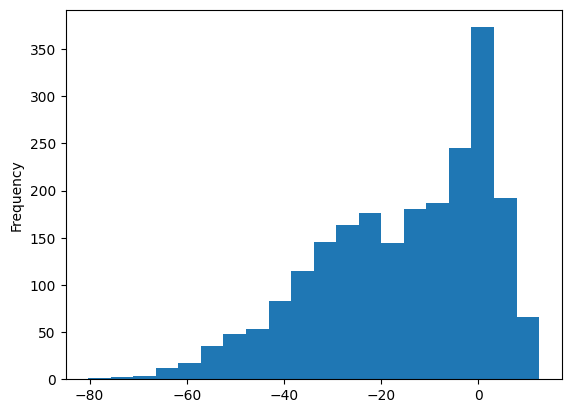

In [6]:
data = np.vstack((mainData, data1, data2))
kinematics = pd.DataFrame(data, columns=['vPhi', 'vR', 'vZ', 'sigmaPhi', 'sigmaR', 'sigmaZ', 'R', 'z'])
(kinematics['vPhi']-220).plot.hist(bins=20)

In [7]:
premade_testing_data = "GaiaDR3_poege5_DoddQuality_2p5kpc.parquet"

In [8]:
df = pl.read_parquet(premade_testing_data)

In [ ]:
df_test = df.sample(2e6, seed=255897)
del df

In [ ]:
# df_test = test_sample.to_pandas()
df_test['vT_adj'] = df_test['vT']-220
df_test[-50 < df_test['vT_adj'] and df_test['vT_adj'] < 175].plot.hist(bins=50, xlim=(-50, 175))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().